<a href="https://colab.research.google.com/github/rinipds/My-Portfolio-Projects/blob/main/Dry_Bean_Classification_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dry Bean Classification Using logistic Regression

##Introduction
Here we are focusing on classifying different types of dry beans into seven classes using a logistic regression model. The dataset consists of various features related to the size and shape of beans, such as Area, Perimeter, MajorAxisLength, and Shape Factors, among others. The classification task aims to accurately distinguish between seven different types of beans: BARBUNYA, BOMBAY, CALI, DERMASON, HOROZ, SEKER, and SIRA.

Logistic Regression is a widely used statistical method for binary and multi-class classification problems. It models the probability that a given input point belongs to a particular class by fitting a logistic function to the data. For multi-class classification, we utilize the Softmax function, which generalizes logistic regression to multiple classes. The Softmax function converts the raw prediction scores (logits) from the logistic regression model into probabilities that sum to one across all classes. This allows us to interpret the model's output as the likelihood of each class, facilitating the classification of the dry beans into their respective categories.

We employ various preprocessing techniques such as scaling and outlier detection using Z-score to clean the dataset. Feature selection is performed by analyzing correlations between features, and we select the most relevant attributes for model training to enhance model performance.

To address class imbalance, which poses a challenge in accurately predicting minority classes, we apply SMOTE (Synthetic Minority Oversampling Technique). This oversampling method helps in balancing the dataset by generating synthetic samples for under-represented classes, leading to a more robust and generalized model.

Finally, the classification performance is evaluated using confusion matrices, both before and after applying SMOTE, providing insights into how the model handles imbalanced data and how effective the oversampling technique is in improving classification accuracy for all bean classes. The results highlight the importance of preprocessing and data balancing in achieving better model performance.








In [ ]:
# to manipulate data
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import the datasets
df = pd.read_csv("/content/Dry_Bean_Dataset.csv")

In [ ]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df.ndim

2

In [ ]:
df.shape

(13611, 17)

In [ ]:
df.size

231387

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

68

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()
# now 0 duplicates

0

In [ ]:
# Drop rows with NaN values
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(14), i

All features have 13,611 non-null values, meaning there are no missing data points.


# Data Exploration and Preprocessing

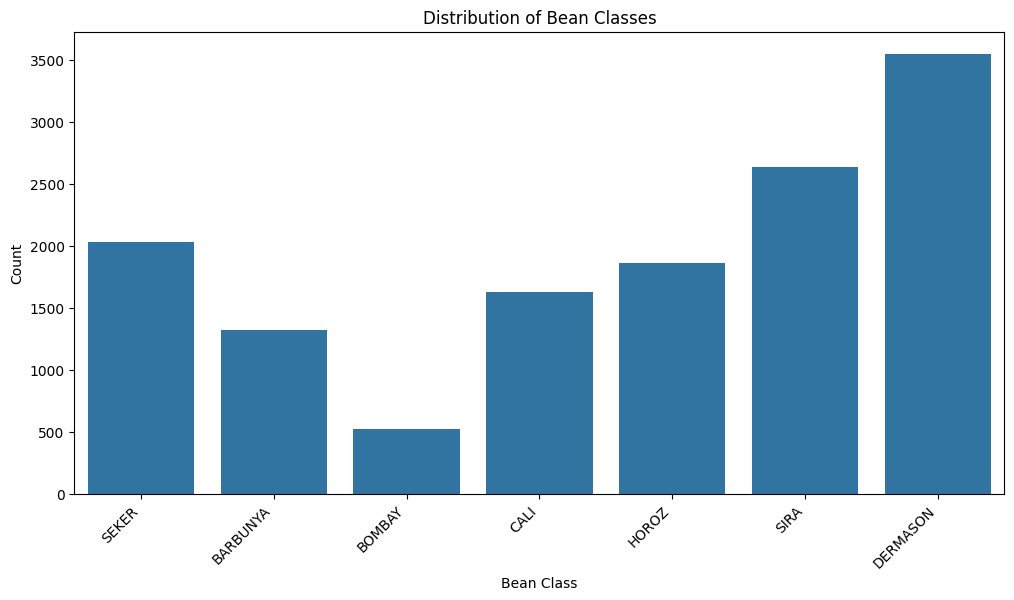

In [ ]:
# countplot of different class
plt.figure(figsize=(12, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Bean Classes')
plt.xlabel('Bean Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000
mean,53048.460385,854.993406,319.895602,202.365321,1.581075,0.750315,53767.986709,253.034094,0.749829,0.987152,0.873671,0.800352,0.006561,0.001719,0.644341,0.995078
std,29392.438324,214.722684,85.809260,45.051632,0.245245,0.091858,29844.248525,59.307709,0.048939,0.004650,0.059393,0.061464,0.001130,0.000595,0.098653,0.004347
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36282.500000,703.230000,253.086806,175.886357,1.430662,0.715144,36673.000000,214.933277,0.718735,0.985678,0.833410,0.763228,0.005893,0.001158,0.582517,0.993720
50%,44580.000000,793.896000,296.404589,192.491117,1.549860,0.763997,45122.000000,238.245711,0.759903,0.988288,0.883490,0.801514,0.006643,0.001700,0.642424,0.996393
75%,61382.000000,977.146500,376.312489,217.245403,1.703916,0.809671,62360.000000,279.560351,0.786849,0.990019,0.917031,0.834470,0.007270,0.002173,0.696341,0.997891
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


###Mean & Std (Standard Deviation):

Features like Area, Perimeter, MajorAxisLength, and ConvexArea have a large range of values with high standard deviations. This suggests there is significant variability in the dimensions and shape forms of the beans.

Some features like Solidity and Extent have much smaller standard deviations, meaning the distribution of these features is more consistent across the dataset.

###Min, Max, and Range:

Area ranges from 20,420 to 254,616, indicating a large variation in the size of the beans.

Perimeter also has a wide range (524.7 to 1,985.37), which aligns with the Area feature.

AspectRatio ranges from 1.02 to 2.43, suggesting that some beans are more elongated than others, with some close to being circular (values near 1 indicate closer to a circular shape).

Eccentricity has a range from 0.22 to 0.91, where values closer to 1 suggest more elongated beans, while values closer to 0 indicate circular shapes.

###Quartiles (25%, 50%, 75%):

The median (50%) values can give a good sense of the central tendency for each feature.
For example:
Area: 44,652, Perimeter: 794.94, and MajorAxisLength: 296.88, show that most beans are somewhat similar in terms of their median size.

Extent (0.759) and Solidity (0.988) are close to 1, indicating that most beans occupy most of the convex hull and are quite solid without large concavities.

The 25%-75% range for most features is relatively tight compared to the entire range, indicating that the majority of data points lie in a somewhat narrower band, while there are some extreme values (outliers) pushing the min-max range further out.

###Potential Outliers:

Features such as Area, Perimeter, and MajorAxisLength have very large max values compared to their 75th percentile, indicating possible outliers in these dimensions (e.g., extremely large beans).

###Symmetry and Skewness:

Many features seem to have positive skewness (e.g., Area, Perimeter, MajorAxisLength), as their means are higher than their medians (50% quartile). This indicates that there are some beans with much larger values than most others, which would push the mean upwards.

###Compactness and Roundness:

Compactness and Roundness are interesting as they indicate how "circular" or "compact" the beans are. With a mean compactness of ~0.799 and roundness of ~0.873, it suggests that most beans are relatively round and compact, but there are variations as indicated by the range of these features.



In [ ]:
#The features have very different scales (e.g., Area goes up to 254,616, while ShapeFactor1 maxes out at 0.010451).
#Therefore, it’s important to scale the data, especially for algorithms like logistic regression that assume all features are on a similar scale.
#Use StandardScaler to normalize the feature ranges.

# Assuming `df` is your dataset, excluding the 'Class' column which is the target
x = df.drop('Class', axis=1)
y = df['Class']

print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")

Shape of x: (13543, 16)
Shape of y: (13543,)


In [ ]:
# Standardization
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Convert back to DataFrame to visualize
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

x_scaled_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,1.354300e+04,1.354300e+04,1.354300e+04,1.354300e+04,1.354300e+04,1.354300e+04,1.354300e+04,1.354300e+04,1.354300e+04,1.354300e+04,1.354300e+04,1.354300e+04,1.354300e+04,1.354300e+04,1.354300e+04,1.354300e+04
mean,-3.357804e-17,4.700925e-16,-2.686243e-16,-3.357804e-17,1.846792e-16,-1.364108e-15,1.007341e-16,-5.708266e-16,1.196218e-15,2.384041e-15,5.372486e-16,-1.712480e-15,-3.357804e-16,1.343121e-16,-4.868815e-16,-2.719821e-14
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-1.110138e+00,-1.538122e+00,-1.588400e+00,-1.772535e+00,-2.268048e+00,-5.784847e+00,-1.108596e+00,-1.547754e+00,-3.974761e+00,-1.460372e+01,-6.466531e+00,-2.599580e+00,-3.349169e+00,-1.939805e+00,-2.372061e+00,-1.090300e+01
25%,-5.704385e-01,-7.068140e-01,-7.786020e-01,-5.877687e-01,-6.133411e-01,-3.829016e-01,-5.728279e-01,-6.424498e-01,-6.353885e-01,-3.169215e-01,-6.779143e-01,-6.040142e-01,-5.914750e-01,-9.417864e-01,-6.267020e-01,-3.125605e-01
50%,-2.881276e-01,-2.845515e-01,-2.737686e-01,-2.191834e-01,-1.272846e-01,1.489557e-01,-2.897143e-01,-2.493593e-01,2.058485e-01,2.442265e-01,1.653179e-01,1.890052e-02,7.268999e-02,-3.159673e-02,-1.942988e-02,3.025331e-01
75%,2.835371e-01,5.689087e-01,6.574928e-01,3.303017e-01,5.009079e-01,6.462006e-01,2.879057e-01,4.472814e-01,7.564623e-01,6.165309e-01,7.300695e-01,5.551101e-01,6.277737e-01,7.617195e-01,5.271149e-01,6.471448e-01
max,6.858056e+00,5.264550e+00,4.882690e+00,5.723271e+00,3.462912e+00,1.753949e+00,7.019803e+00,5.334078e+00,2.377834e+00,1.618441e+00,1.970233e+00,3.041733e+00,3.443673e+00,3.267675e+00,3.349501e+00,1.070731e+00


The patterns in the data are the same (relationships, trends, quartiles in terms of ranks, etc.).

The numerical values of features are transformed to be centered around 0 with a standard deviation of 1.

The insights from the original data will still apply after scaling, but now you can interpret the features in terms of standardized units (i.e., how far a feature deviates from the mean).

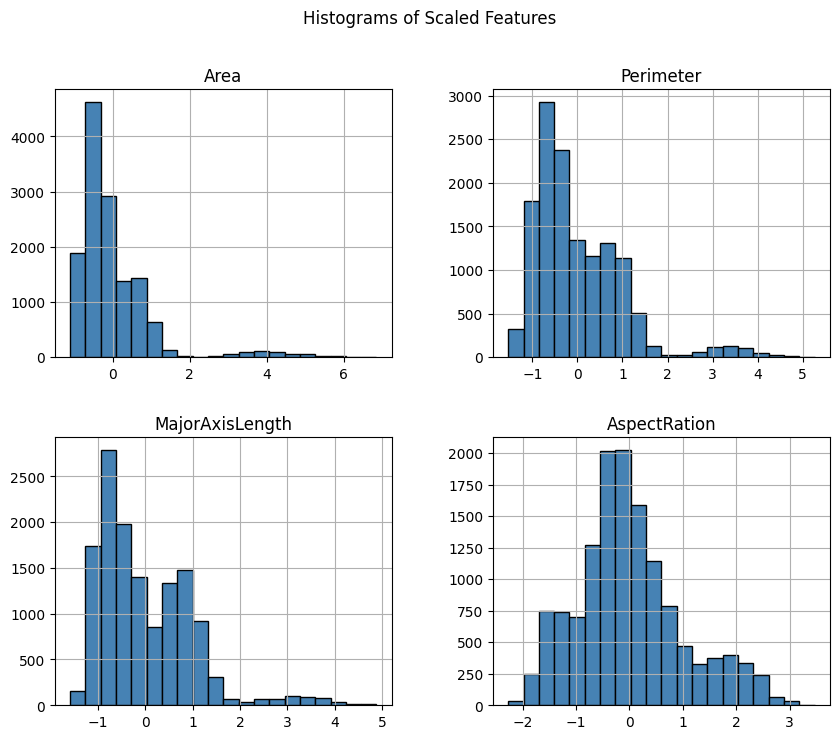

In [ ]:
# Visualizing the distributions after scaling (example with first few features)
x_scaled_df[['Area', 'Perimeter', 'MajorAxisLength', 'AspectRation']].hist(bins=20, figsize=(10, 8), color='steelblue', edgecolor='black')
plt.suptitle("Histograms of Scaled Features")
plt.show()

The visualizations suggest that the features are fairly symmetrical and centralized around zero after scaling, though some features (like Area) exhibit many outliers. These outliers could influence model performance and may require further investigation or handling.

Outliers beyond a certain threshold can be removed



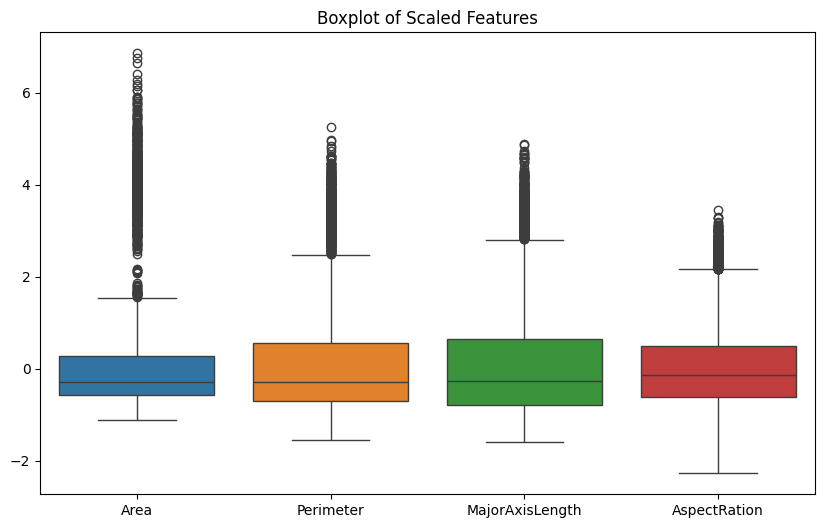

In [ ]:
#Boxplots are useful to detect outliers and understand the distribution of features.
plt.figure(figsize=(10, 6))
sns.boxplot(data=x_scaled_df[['Area', 'Perimeter', 'MajorAxisLength', 'AspectRation']])
plt.title("Boxplot of Scaled Features")
plt.show()

In [ ]:
#To remove outliers specifically from the'Area', 'Perimeter', 'MajorAxisLength', 'AspectRation' columns, we can use the IQR (Interquartile Range) Method

# Columns from which to remove outliers
columns = ['Area', 'Perimeter', 'MajorAxisLength', 'AspectRation']

# Iterate over each column and calculate the IQR and bounds
for col in columns:
    Q1 = x_scaled_df[col].quantile(0.25)  # 25th percentile
    Q3 = x_scaled_df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                # Interquartile Range

    # Calculate lower and upper bounds for outliers
   # Increase the threshold to 3 times the IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove rows with outliers for the current column
    df_no_outliers = x_scaled_df[(x_scaled_df[col] >= lower_bound) & (x_scaled_df[col] <= upper_bound)]

# Output the new shape of the DataFrame after removing outliers
print(f"DataFrame shape after removing outliers from {columns}: {df_no_outliers.shape}")

DataFrame shape after removing outliers from ['Area', 'Perimeter', 'MajorAxisLength', 'AspectRation']: (13058, 16)


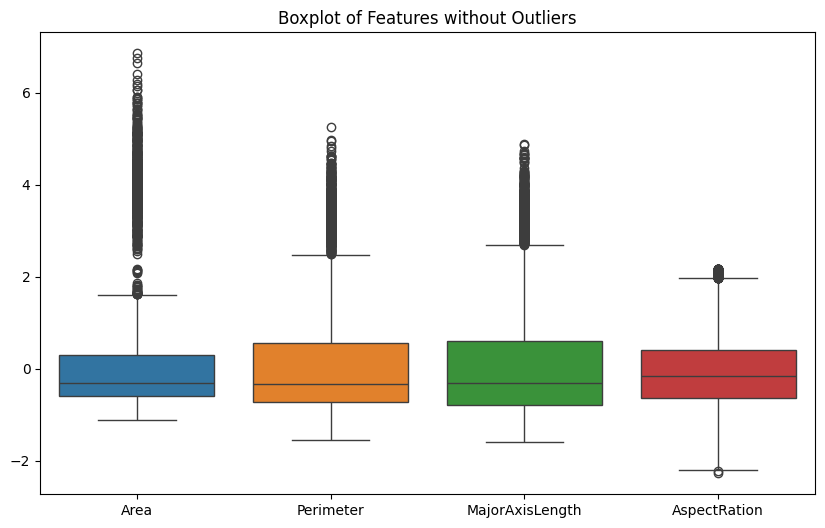

In [ ]:
# Create a boxplot for the specified columns
plt.figure(figsize=(10, 6))
sns.boxplot(data= df_no_outliers[['Area', 'Perimeter', 'MajorAxisLength', 'AspectRation']])
plt.title('Boxplot of Features without Outliers')
plt.show()

It looks like there hasn't been a significant reduction in the number of outliers even after applying the IQR-based method with increased threshold multiplier from 1.5 to a higher value like 2 or 3.

Another way to identify outliers is by using the Z-score, which measures how many standard deviations a point is from the mean. Typically, values with a Z-score greater than 3 or less than -3 are considered outliers.

In [ ]:
print(f"Shape of x: {df_no_outliers.shape}")
print(f"Shape of y: {y.shape}")

Shape of x: (13058, 16)
Shape of y: (13543,)


In [ ]:
from scipy import stats

# Define a threshold for Z-scores
z_threshold = 3

# Calculate Z-scores for the selected columns
z_scores = stats.zscore(df_no_outliers[['Area', 'Perimeter', 'MajorAxisLength', 'AspectRation']])

# Filter the DataFrame based on Z-score threshold
df_no_outliers1 = df_no_outliers[(abs(z_scores) < z_threshold).all(axis=1)]

In [ ]:
# Output the new shape of the DataFrame after removing outliers
print(f"DataFrame shape after removing outliers from {columns}: {df_no_outliers1.shape}")

DataFrame shape after removing outliers from ['Area', 'Perimeter', 'MajorAxisLength', 'AspectRation']: (12583, 16)


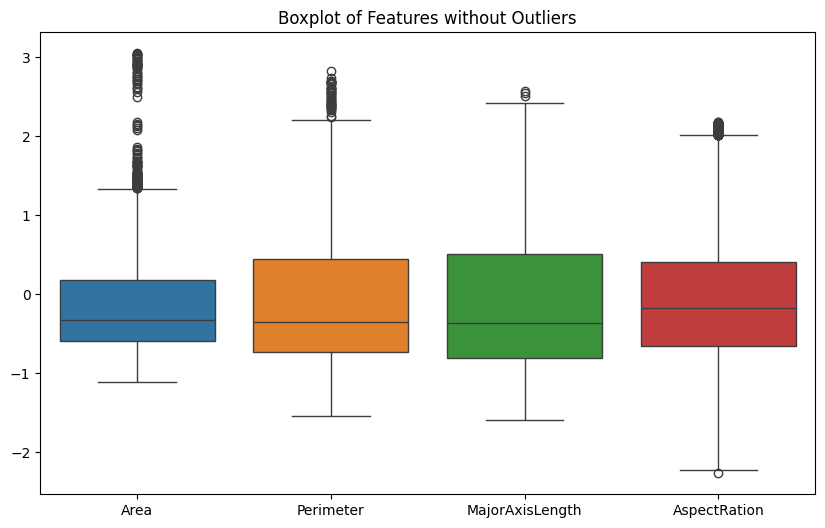

In [ ]:
# Create a boxplot for the specified columns
plt.figure(figsize=(10, 6))
sns.boxplot(data= df_no_outliers1[['Area', 'Perimeter', 'MajorAxisLength', 'AspectRation']])
plt.title('Boxplot of Features without Outliers')
plt.show()

The overall distribution  now appear more compact, with the outliers reduced to more acceptable boundaries, reducing the influence of extreme data points.

This cleaner dataset will likely improve our machine learning model's performance, as the extreme values would no longer disproportionately influence the results.

Text(0.5, 1.0, 'Correlation Heatmap of Scaled Features')

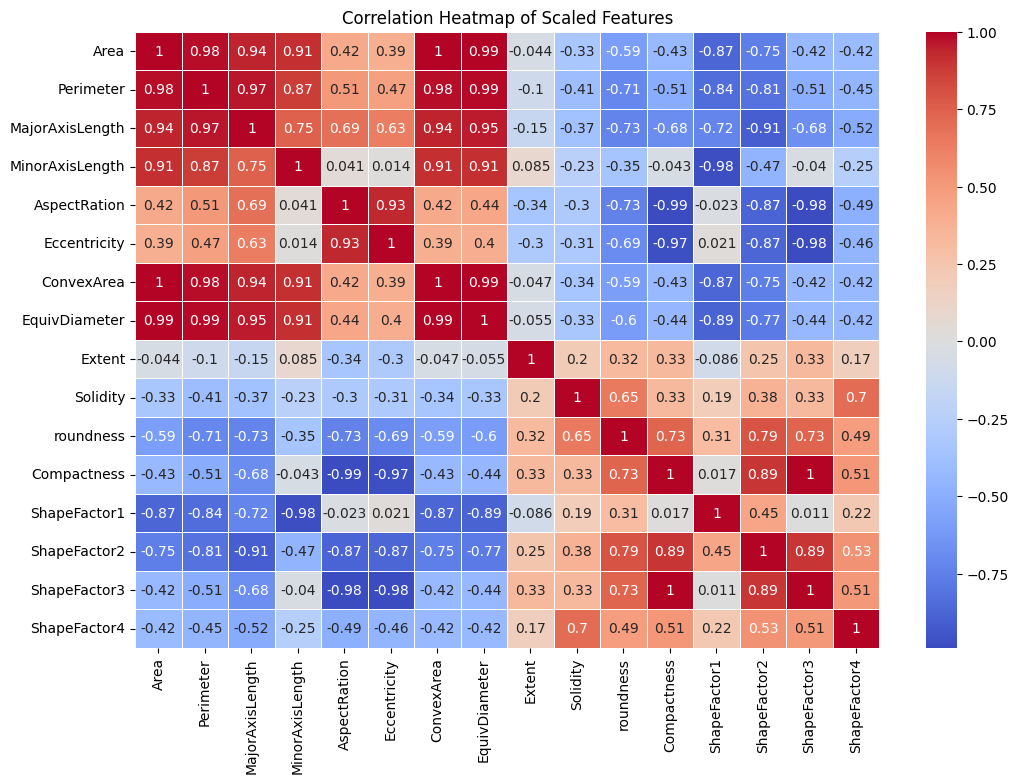

In [ ]:
#Visualizing correlations helps you understand the linear relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(df_no_outliers1.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Scaled Features")

###Highly Correlated Features:

Features like Area, Perimeter, MajorAxisLength, and ConvexArea show extremely high correlations (above 0.98). This means they are likely to convey redundant information.
For example, the correlation between Area and Perimeter is 0.98, and between ConvexArea and Area, it’s 1.0. Including all of these in the logistic regression model could lead to multicollinearity, which negatively impacts model interpretability and performance.

Action: we can drop some of the highly correlated features. Since Area and ConvexArea are perfectly correlated, you can keep Area and drop ConvexArea. Similarly, either Perimeter or MajorAxisLength can be dropped.

###AspectRatio:

AspectRatio has a lower correlation with Area (0.42) and Perimeter (0.51), meaning it captures a different aspect of the data—likely related to the shape rather than size. It also has strong positive correlations with Eccentricity (0.93) and negative correlations with ShapeFactor1 (-0.87).

Action: Keep AspectRatio because it provides unique information about the bean's shape and complements the size-related features.

###Shape Factors:

ShapeFactor1, ShapeFactor2, and ShapeFactor3 have negative correlations with Area, Perimeter, and MajorAxisLength, and positive correlations with each other.
ShapeFactor1 is strongly anti-correlated with the size-related features, suggesting it captures opposite or complementary information. However, all Shape Factors have high correlations with each other (e.g., ShapeFactor1 and ShapeFactor2: 0.89).

Action: We can keep ShapeFactor1 (or another ShapeFactor), but avoid including all of them to reduce redundancy. ShapeFactor1 seems to be a strong candidate as it has a wide range of relationships with other features.

###Solidity, Compactness, and Roundness:

These features provide different shape-related information. For example, Compactness has a strong negative correlation with AspectRatio and a moderate positive correlation with ShapeFactor3, suggesting it captures other shape properties.
Roundness is negatively correlated with Area and Perimeter, so it captures information that may differentiate classes based on more complex shape characteristics.

Action: These features can be kept since they are not strongly correlated with the size-related features and can provide valuable shape-related differentiation for classification.



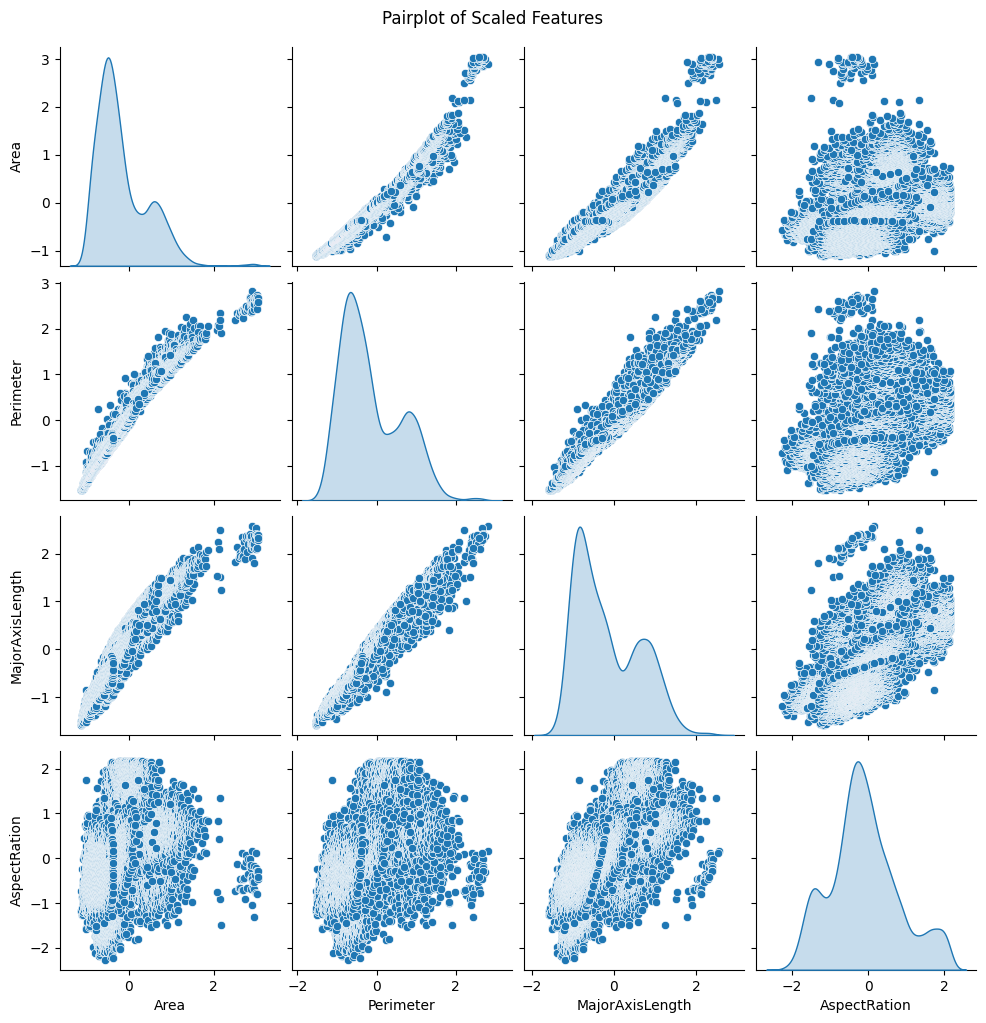

In [ ]:
#Pairplots allows to explore pairwise relationships between features and can observe clusters, trends, or patterns in the relationships.
sns.pairplot(df_no_outliers1[['Area', 'Perimeter', 'MajorAxisLength', 'AspectRation']], diag_kind='kde')
plt.suptitle("Pairplot of Scaled Features", y=1.02)
plt.show()

###Area, Perimeter, MajorAxisLength:

As seen in the pairplot, these features exhibit strong linear relationships. Including all of them is unnecessary since they are redundant. You can drop one or two of them.

###AspectRatio:

The AspectRatio scatter plots show complex patterns, particularly against Area and Perimeter. This suggests AspectRatio could be valuable in distinguishing between beans that are otherwise similar in size but different in shape.

###ShapeFactor1 and Compactness:

From the correlation matrix, these shape-based features have weaker correlations with the size-based features and should be considered as potential candidates for the model since they add valuable information on the geometric properties of the beans.

#Feature Selection Strategy for Logistic Regression:

###Drop Highly Correlated Features:

From the correlation matrix and pairplot, you can drop the following features to avoid multicollinearity:

Drop ConvexArea (since it is perfectly correlated with Area).

Drop either Perimeter or MajorAxisLength (because they are strongly correlated with each other and Area).

Drop one of the Shape Factors (keep ShapeFactor1 or ShapeFactor2 but not both).

###Keep Key Features:

Area: Keep as a primary size-related feature.

AspectRatio: Keep because it adds valuable shape-related information.
ShapeFactor1 (or ShapeFactor2): Keep as a shape-related feature that is complementary to the size-related features.

Compactness, Roundness, and Solidity: Keep to capture non-linear shape characteristics.

###Final Feature Set Suggestion:
Area (size)

AspectRatio (shape)

ShapeFactor1 (shape)

Compactness (shape)

Solidity (shape)

Roundness (shape)

Extent (shape)

By focusing on a mix of size and shape-related features, we are having a more balanced set of predictors that capture both size and geometric properties of the dry beans, without introducing multicollinearity.

In [ ]:
df_no_outliers1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12583 entries, 0 to 13542
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             12583 non-null  float64
 1   Perimeter        12583 non-null  float64
 2   MajorAxisLength  12583 non-null  float64
 3   MinorAxisLength  12583 non-null  float64
 4   AspectRation     12583 non-null  float64
 5   Eccentricity     12583 non-null  float64
 6   ConvexArea       12583 non-null  float64
 7   EquivDiameter    12583 non-null  float64
 8   Extent           12583 non-null  float64
 9   Solidity         12583 non-null  float64
 10  roundness        12583 non-null  float64
 11  Compactness      12583 non-null  float64
 12  ShapeFactor1     12583 non-null  float64
 13  ShapeFactor2     12583 non-null  float64
 14  ShapeFactor3     12583 non-null  float64
 15  ShapeFactor4     12583 non-null  float64
dtypes: float64(16)
memory usage: 1.6 MB


In [ ]:
# Selecting the final feature set
df_selected = df_no_outliers1[['Area', 'AspectRation', 'ShapeFactor1','ShapeFactor3','ShapeFactor4', 'Compactness', 'Solidity', 'roundness', 'Extent']]

# Display the first few rows of the new dataframe
df_selected.info()

#The new dataframe df_final will contain all columns except the ones that were dropped.

<class 'pandas.core.frame.DataFrame'>
Index: 12583 entries, 0 to 13542
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          12583 non-null  float64
 1   AspectRation  12583 non-null  float64
 2   ShapeFactor1  12583 non-null  float64
 3   ShapeFactor3  12583 non-null  float64
 4   ShapeFactor4  12583 non-null  float64
 5   Compactness   12583 non-null  float64
 6   Solidity      12583 non-null  float64
 7   roundness     12583 non-null  float64
 8   Extent        12583 non-null  float64
dtypes: float64(9)
memory usage: 983.0 KB


In [ ]:
#finding unique values of column class
unique_classes = df['Class'].unique()
print(unique_classes)

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


In [ ]:
print(f"Shape of df_selected: {df_selected.shape}")
print(f"Shape of y: {y.shape}")

Shape of df_selected: (12583, 9)
Shape of y: (13543,)


In [ ]:
# Identify which indices in df_selected are not in y
missing_indices = df_selected.index.difference(y.index)

# Check if there are any missing indices
print(missing_indices)

Index([5505, 5509, 5548, 5554, 5599, 5623, 5659, 5679, 5683, 5715, 5721, 5756,
       5813, 5821, 5838, 5939, 5959, 6046, 6081, 6140, 6178, 6253, 6307, 6326,
       6442, 6451, 6480, 6510, 6515, 6582, 6598, 6609, 6631, 6690, 6750, 6763,
       6778, 6788, 6803, 6891, 6971, 7011, 7028, 7067, 7095, 7113, 7123, 7136,
       7144, 7172, 7180, 7195, 7208, 7234, 7278, 7340, 7342],
      dtype='int64')


In [ ]:
# Filter df_selected to retain only rows with indices that exist in y
df_selected = df_selected[df_selected.index.isin(y.index)]
#This ensures that both df_selected and y_filtered are aligned with matching rows.

# Filter y to retain only rows with indices that exist in df_selected
y_filtered = y.loc[df_selected.index]

In [ ]:
print(f"Shape of df_selected: {df_selected.shape}")
print(f"Shape of y_filtered: {y_filtered.shape}")

Shape of df_selected: (12526, 9)
Shape of y_filtered: (12526,)


In [ ]:
# Combine df_selected and y_filtered along the columns
df_final = pd.concat([df_selected, y_filtered], axis=1)

# Now df_final will have both features and the target variable in one dataframe
df_final.head()

,Area,AspectRation,ShapeFactor1,ShapeFactor3,ShapeFactor4,Compactness,Solidity,roundness,Extent,Class
0,-0.838800,-1.565363,0.681918,1.924811,0.838679,1.838628,0.366476,1.420346,0.287981,SEKER
1,-0.827266,-1.972460,0.369551,2.691446,0.771141,2.497622,-0.465886,0.224987,0.697598,SEKER
2,-0.805287,-1.514305,0.604373,1.840150,0.917418,1.764053,0.517614,1.248979,0.577958,SEKER
3,-0.783920,-1.742960,0.403254,2.204306,-0.202372,2.082211,-2.248692,0.509588,0.671302,SEKER
4,-0.779429,-2.121534,0.120215,3.016333,0.940406,2.768598,0.804605,1.872434,0.475476,SEKER


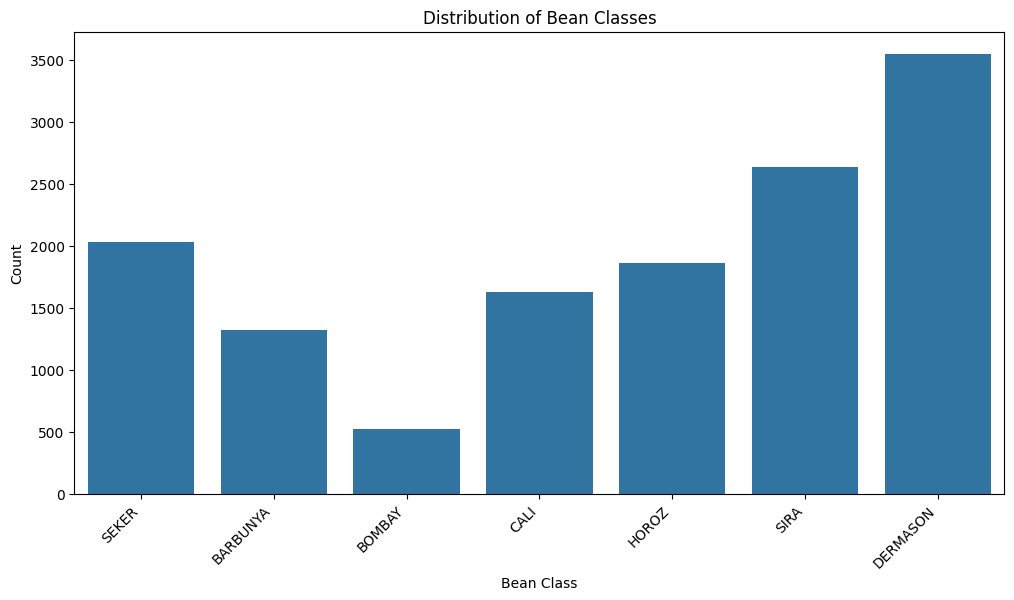

In [ ]:
# countplot of different class from original dataset df
plt.figure(figsize=(12, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Bean Classes')
plt.xlabel('Bean Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

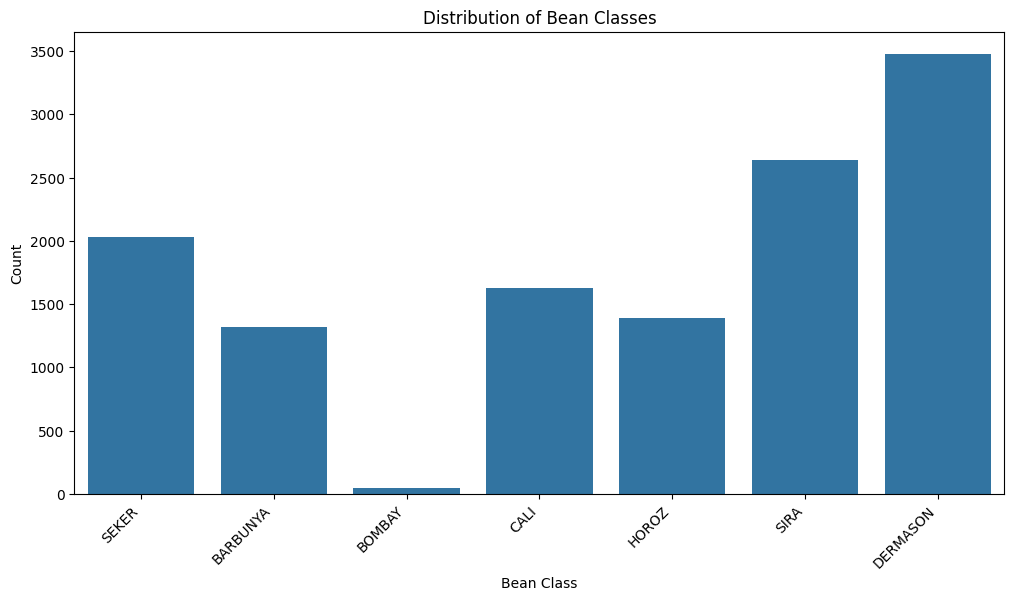

In [ ]:
# countplot of different class
plt.figure(figsize=(12, 6))
sns.countplot(x='Class', data=df_final)
plt.title('Distribution of Bean Classes')
plt.xlabel('Bean Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#Convert Target to Numerical Form

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert the 'class' column to numerical labels
df_final['Class'] = label_encoder.fit_transform(df_final['Class'])

# Check the mapping of the classes
print(dict(enumerate(label_encoder.classes_)))


{0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'}


In [ ]:
# Split the data into features (X) and target (y)
X = df_final.drop(columns=['Class'])
y = df_final['Class']

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Train the Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# model is dealing with a multi-class classification problem with 7 classes, the activation function used in this case is Softmax.
# In binary classification, the sigmoid function is often used to map logits to probabilities between 0 and 1 for two classes.
# However, in multi-class classification (with 3 or more classes), Softmax is used because it generalizes sigmoid to multiple classes.
# Initialize logistic regression with multinomial (Softmax) option
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# Make predictions on the train set
y_train_pred = logreg.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_train, y_train_pred))

Accuracy: 0.9123908878007239
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       988
           1       1.00      1.00      1.00        36
           2       0.93      0.94      0.94      1214
           3       0.90      0.92      0.91      2624
           4       0.93      0.88      0.91      1039
           5       0.95      0.95      0.95      1509
           6       0.86      0.87      0.87      1984

    accuracy                           0.91      9394
   macro avg       0.93      0.93      0.93      9394
weighted avg       0.91      0.91      0.91      9394



In [ ]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9080459770114943
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       334
           1       1.00      1.00      1.00        11
           2       0.93      0.94      0.94       416
           3       0.90      0.91      0.91       854
           4       0.92      0.91      0.92       347
           5       0.95      0.94      0.94       518
           6       0.85      0.86      0.85       652

    accuracy                           0.91      3132
   macro avg       0.93      0.92      0.93      3132
weighted avg       0.91      0.91      0.91      3132



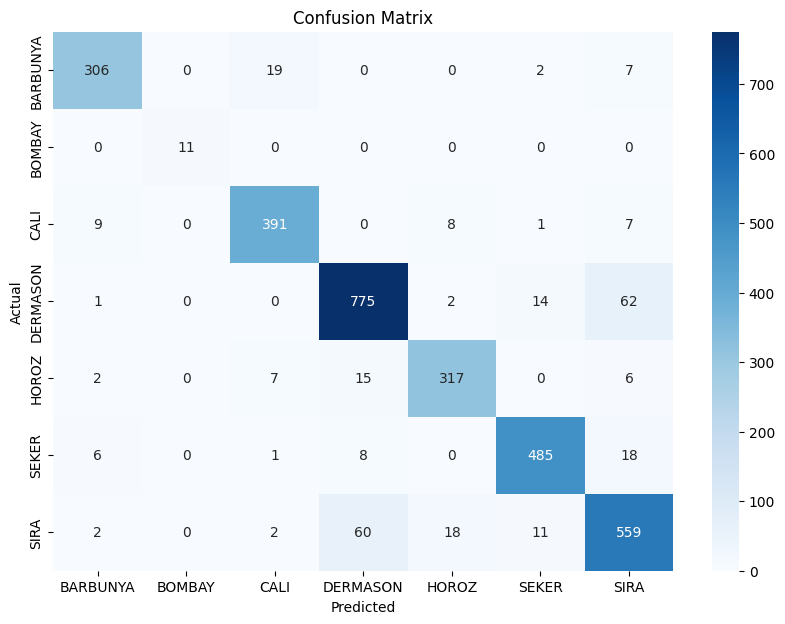

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Insights
DERMASON and SIRA classes are predicted most accurately (with high diagonal values of 775 and 559, respectively).

BOMBAY and HOROZ have much lower correct predictions, indicating a potential imbalance or difficulty distinguishing these classes.

Misclassifications:
BARBUNYA has some misclassifications as DERMASON (19 cases).

HOROZ has 15 cases classified as DERMASON and 7 as CALI.

SIRA has 60 misclassified as DERMASON.

These results suggest that some classes are either under-represented or the model struggles to differentiate between similar classes (e.g., DERMASON and SIRA).

#Handling Class Imbalance for better accuracy:

Since certain classes (like Bombay) are underrepresented, the model's performance on those classes could be improved by techniques such as oversampling, undersampling, or using class weights in logistic regression.

One common way to do this is by generating synthetic data for the underrepresented classes.

SMOTE is a popular technique that generates synthetic samples by interpolating between existing samples of the minority classes. It’s particularly useful in balancing datasets with multi-class classification problems.

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to your training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
# Split the resampled data into training and test sets
X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Initialize the logistic regression model
logreg1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model on the resampled data
logreg1.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# Make predictions on the train set
y_train_pred1 = logreg1.predict(X_train_resampled)

# Evaluate the model
accuracy_test_resampled = accuracy_score( y_train_resampled, y_train_pred1)
print(f"Accuracy: {accuracy_test_resampled}")

Accuracy: 0.9314024390243902


In [ ]:
# Predict the target for the test set
y_pred = logreg.predict(X_test)

In [ ]:
# Calculate the accuracy of the test
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9322735191637631


The application of SMOTE has positively impacted the model’s performance, leading to enhanced accuracy in both training and test sets. This reflects better learning and representation of the classes in the dataset.

The increase in accuracy suggests that SMOTE has effectively addressed the class imbalance issues in the dataset. By generating synthetic samples for minority classes, the model has learned to differentiate these classes better.

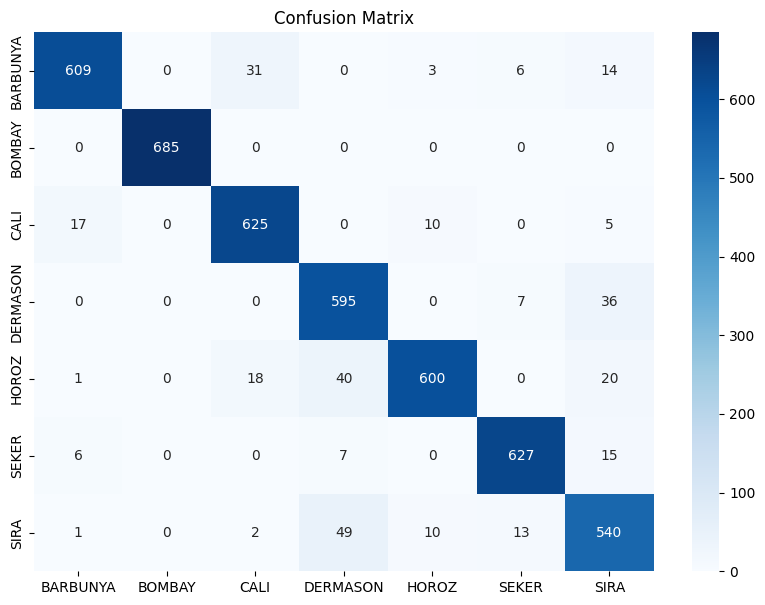

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.show()

BOMBAY class now has 685 correct predictions, compared to 11 before SMOTE. This is a substantial improvement in classification accuracy.

HOROZ class shows a big jump in correct predictions (from 317 before SMOTE to 600 after SMOTE), which indicates that the model now has a better ability to recognize this class.

BARBUNYA has significantly improved accuracy, with 609 correct predictions (up from 306 before SMOTE).

CALI also improves, with 625 correct predictions (from 391), though there are still some misclassifications with other classes.

Remaining Issues:
SIRA has seen some improvement in its classification (540 correct after SMOTE vs. 559 before), but there are still misclassifications, especially 49 cases being predicted as DERMASON.

DERMASON still has some confusion, with 36 misclassified as SIRA and 49 cases of SIRA predicted as DERMASON.

The SMOTE technique has clearly helped balance the data, resulting in better classification for minority classes (like BOMBAY and HOROZ).

The misclassifications between DERMASON and SIRA still suggest these classes may share some overlapping features or patterns, which may require additional feature engineering or tuning of the model.